In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [2]:
meta_data=pd.read_csv("~/hip/qc_hip_metadata.csv", index_col=0)

In [5]:
scp_wc_tx=sc.read_csv("/home/AD/agelber/hip/hip_counts.csv")



In [6]:
meta_data=meta_data.reindex(scp_wc_tx.obs.index)


In [7]:
sc.pp.recipe_zheng17(scp_wc_tx)
sc.pp.neighbors(scp_wc_tx)
sc.tl.louvain(scp_wc_tx)
sc.tl.paga(scp_wc_tx)
sc.tl.umap(scp_wc_tx)
sc.tl.rank_genes_groups(scp_wc_tx, 'louvain')

         Falling back to preprocessing with `sc.pp.pca` and default params.
/home/AD/agelber/anaconda3/envs/myenv/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


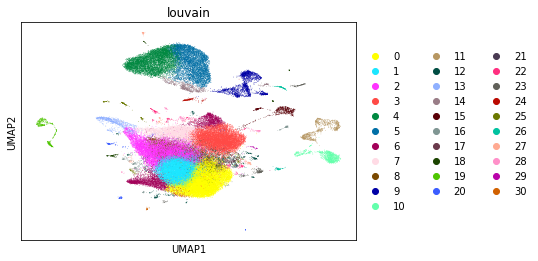

In [8]:
sc.pl.umap(scp_wc_tx, color='louvain')

In [11]:
scp_wc_tx.obs['subclass']=meta_data['subclass_label']

... storing 'subclass' as categorical


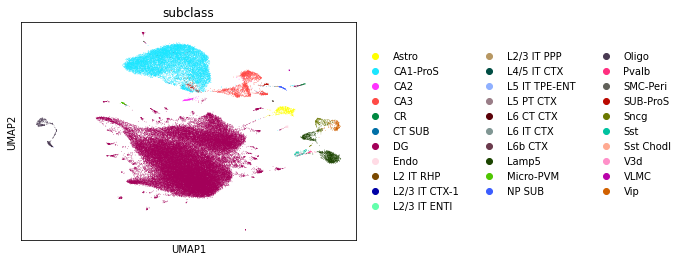

In [12]:
sc.pl.umap(scp_wc_tx, color='subclass')

In [13]:
imputed_scanpy=sc.read_csv("/home/AD/agelber/hip/FirstImputed.csv")
imp_md=meta_data.reindex(imputed_scanpy.obs.index)


In [14]:
imputed_scanpy.obs['subclass']=imp_md['subclass_label']

In [15]:
sc.pp.recipe_zheng17(imputed_scanpy)
sc.pp.neighbors(imputed_scanpy)
sc.tl.louvain(imputed_scanpy)
sc.tl.paga(imputed_scanpy)
sc.tl.umap(imputed_scanpy)
sc.tl.rank_genes_groups(imputed_scanpy, 'louvain')

         Falling back to preprocessing with `sc.pp.pca` and default params.
... storing 'subclass' as categorical
/home/AD/agelber/anaconda3/envs/myenv/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


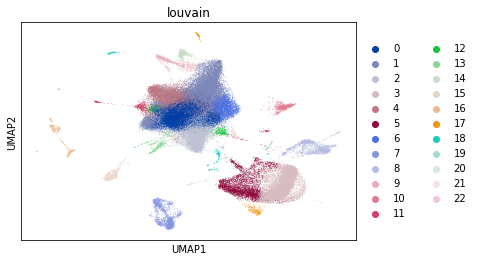

In [16]:
sc.pl.umap(imputed_scanpy, color='louvain')

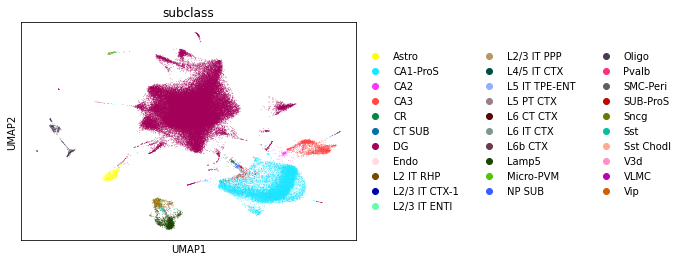

In [17]:
sc.pl.umap(imputed_scanpy, color='subclass')